# Projet 10. Détectez des faux billets avec Python

<div>
<img src="ONCFM.png" style = "width: 600px; height: 280px" title = "Détectez des faux billet"/>
</div>

<center> 
Thi Tuong LE

## 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import het_white , normal_ad
from sklearn.linear_model import LinearRegression

from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels

from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib.collections import LineCollection
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn import decomposition, preprocessing
from sklearn import cluster, metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from statsmodels.api import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score, classification_report

from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 2. Nettoyage les data

In [2]:
# get cwd
import os
os.getcwd()

'/Users/thituongle/Desktop/DA-P10'

In [3]:
billets_prod = pd.read_csv("billets_production.csv")

In [4]:
billets_prod

diagonal  height_left  height_right  margin_low  margin_up  length   id
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5

In [5]:
billets_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      5 non-null      float64
 1   height_left   5 non-null      float64
 2   height_right  5 non-null      float64
 3   margin_low    5 non-null      float64
 4   margin_up     5 non-null      float64
 5   length        5 non-null      float64
 6   id            5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 408.0+ bytes


In [6]:
bil = pd.read_csv("billets.csv", sep=";", decimal='.')

In [7]:
bil

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113.09  
2     113.16  
3     113.51  
4     112.54  
...      ...  
1495  111.28  
1496  110.97  
1497  111.95  
1498  112.25  
1499  112.07  

[1500 rows x 7 columns]

In [8]:
print(bil.isnull().values.any())

True


In [9]:
print (bil.duplicated().values.any())

False


In [10]:
bil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [11]:
bil['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

'margin_low' a manque des données

In [12]:
bil.loc[bil['margin_low'].isnull(),:]

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

- **length** : la longueur du billet ;
- **height_left** : la hauteur du billet (mesurée sur le côté gauche) ;
- **height_right** : La hauteur du billet (mesurée sur le côté droit) ;
- **margin_up** : la marge entre le bord supérieur du billet et l'image de celui-ci ;
- **margin_low** : la marge entre le bord inférieur du billet et l'image de celui-ci ;
- **diagonal** : la diagonale du billet ;
- **is_genuine** : Indication si le billet est vrai *(True)* ou faux *(False)*.

### 2.1. Description les data

In [13]:
#data comprends les valeurs manquantes
data_nan = bil[bil.isnull().any(axis=1)]
data_nan.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45         NaN       3.25   
99         True    171.93       104.07        104.18         NaN       3.14   
151        True    172.07       103.80        104.38         NaN       3.02   
197        True    171.45       103.66        103.80         NaN       3.62   
241        True    171.83       104.14        104.06         NaN       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

In [14]:
data_nan['is_genuine'].value_counts()
# 29 vrai billets et 8 faux billets

True     29
False     8
Name: is_genuine, dtype: int64

On trouve que 'margin_low' comprends 37 valeurs manquantes

### 2.2. Vérification de corrélation entre les variables

In [15]:
bil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [16]:
#On créer un nouveau data qui ne comprend pas les valeurs manquantes
data1 = bil.dropna(inplace = True)

In [17]:
# nous creons un e latrice de correlation afin d'etudier la correlation entre mes variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bil['is_genuine']= le.fit_transform(bil['is_genuine'])
df= bil
df['is_genuine'].unique()

array([1, 0])

<AxesSubplot:>

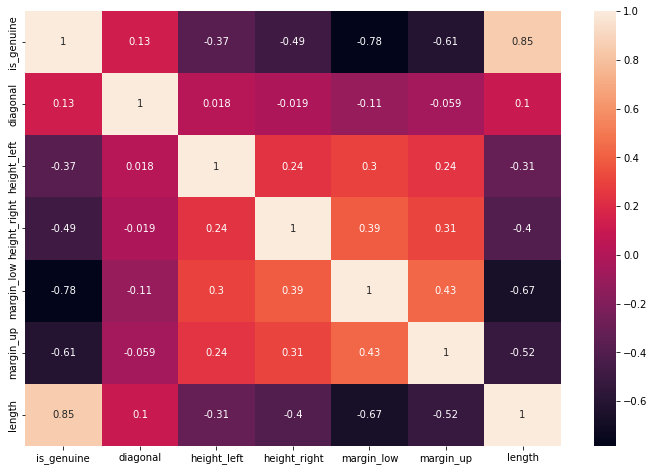

In [18]:
plt.figure(figsize=(12, 8))
sns.heatmap(bil.corr(), annot=True)

On va voir 'is_genuine' et 'lenght' avec le valeur 0,85 c'est à dire il y a de corrélation. 

2 variables: margin_low et length sont différent entre true et false. -> 2 variables importantes pour faire la regression linéaire -> discriminer les vrais et faux billets


## 2.3. Régression linéaire multiple

In [19]:
bil.shape # verifier qu'il s'agit bien du set de donnee sans les valeurs nulles

(1463, 7)

In [20]:
bil.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [21]:
# Nous supprimons la colonne 'is_genuine' pour pouvoir effectuer notre analyse correctement.
bil_6_df = bil.drop(columns='is_genuine')

In [22]:
bil_6_df

diagonal  height_left  height_right  margin_low  margin_up  length
0       171.81       104.86        104.95        4.52       2.89  112.83
1       171.46       103.36        103.66        3.77       2.99  113.09
2       172.69       104.48        103.50        4.40       2.94  113.16
3       171.36       103.91        103.94        3.62       3.01  113.51
4       171.73       104.28        103.46        4.04       3.48  112.54
...        ...          ...           ...         ...        ...     ...
1495    171.75       104.38        104.17        4.42       3.09  111.28
1496    172.19       104.63        104.44        5.27       3.37  110.97
1497    171.80       104.01        104.12        5.51       3.36  111.95
1498    172.06       104.28        104.06        5.17       3.46  112.25
1499    171.47       104.15        103.82        4.63       3.37  112.07

[1463 rows x 6 columns]

In [23]:
# Separation des donnees manquantes
bil_test_df = data_nan

In [24]:
bil_test_df

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72          True    171.94       103.89        103.45         NaN       3.25   
99          True    171.93       104.07        104.18         NaN       3.14   
151         True    172.07       103.80        104.38         NaN       3.02   
197         True    171.45       103.66        103.80         NaN       3.62   
241         True    171.83       104.14        104.06         NaN       3.02   
251         True    171.80       103.26        102.82         NaN       2.95   
284         True    171.92       103.83        103.76         NaN       3.23   
334         True    171.85       103.70        103.96         NaN       3.00   
410         True    172.56       103.72        103.51         NaN       3.12   
413         True    172.30       103.66        103.50         NaN       3.16   
445         True    172.34       104.42        103.22         NaN       3.01   
481         True    171.81       103.53        103.96         NaN       2.71   
505         True    172.01       103.97        104.05         NaN       2.98   
611         True    171.80       103.68        103.49         NaN       3.30   
654         True    171.97       103.69        103.54         NaN       2.70   
675         True    171.60       103.85        103.91         NaN       2.56   
710         True    172.03       103.97        103.86         NaN       3.07   
739         True    172.07       103.74        103.76         NaN       3.09   
742         True    172.14       104.06        103.96         NaN       3.24   
780         True    172.41       103.95        103.79         NaN       3.13   
798         True    171.96       103.84        103.62         NaN       3.01   
844         True    171.62       104.14        104.49         NaN       2.99   
845         True    172.02       104.21        104.05         NaN       2.90   
871         True    171.37       104.07        103.75         NaN       3.07   
895         True    171.81       103.68        103.80         NaN       2.98   
919         True    171.92       103.68        103.45         NaN       2.58   
945         True    172.09       103.74        103.52         NaN       3.02   
946         True    171.63       103.87        104.66         NaN       3.27   
981         True    172.02       104.23        103.72         NaN       2.99   
1076       False    171.57       104.27        104.44         NaN       3.21   
1121       False    171.40       104.38        104.19         NaN       3.17   
1176       False    171.59       104.05        103.94         NaN       3.02   
1303       False    172.17       104.49        103.76         NaN       2.93   
1315       False    172.08       104.15        104.17         NaN       3.40   
1347       False    171.72       104.46        104.12         NaN       3.61   
1435       False    172.66       104.33        104.41         NaN       3.56   
1438       False    171.90       104.28        104.29         NaN       3.24   

      length  
72    112.79  
99    113.08  
151   112.93  
197   113.27  
241   112.36  
251   113.22  
284   113.29  
334   113.36  
410   112.95  
413   112.95  
445   112.97  
481   113.99  
505   113.65  
611   112.84  
654   112.79  
675   113.27  
710   112.65  
739   112.41  
742   113.07  
780   113.41  
798   114.44  
844   113.35  
845   113.62  
871   113.27  
895   113.82  
919   113.68  
945   112.78  
946   112.68  
981   113.37  
1076  111.87  
1121  112.39  
1176  111.29  
1303  111.21  
1315  112.29  
1347  110.31  
1435  111.47  
1438  111.49

In [25]:
# .corr() Nous l'utilisons pour trouver la corrélation par paire de toutes les colonnes de la trame de données.
bil_6_df.corr()

diagonal  height_left  height_right  margin_low  margin_up  \
diagonal      1.000000     0.018265     -0.019428   -0.111534  -0.059147   
height_left   0.018265     1.000000      0.235132    0.302643   0.243812   
height_right -0.019428     0.235132      1.000000    0.391085   0.306867   
margin_low   -0.111534     0.302643      0.391085    1.000000   0.431606   
margin_up    -0.059147     0.243812      0.306867    0.431606   1.000000   
length        0.100758    -0.314344     -0.404272   -0.666753  -0.521139   

                length  
diagonal      0.100758  
height_left  -0.314344  
height_right -0.404272  
margin_low   -0.666753  
margin_up    -0.521139  
length        1.000000

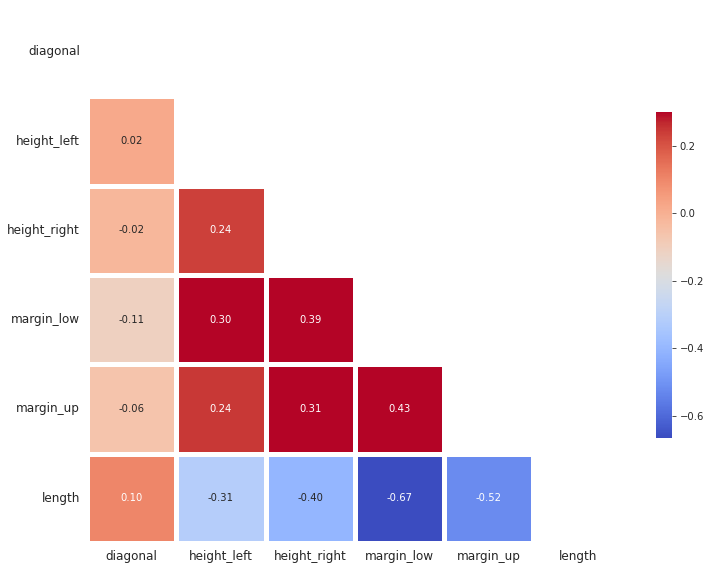

In [26]:
corr = bil_6_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, 
                     linewidth=5, annot = True, fmt='.2f', cmap="coolwarm", cbar_kws={"shrink": 0.5})
    plt.xticks(rotation=0, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

On voit qu'il y a une forte corrélation négative entre 'margin_low' et 'length' avec une valeur de -0.67

In [27]:
reg_multi = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data = bil_6_df).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          2.60e-202
Time:                        20:13:58   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382   

- P_value: Ici, elle est très faible et inférieure au seuil alpha 5 %, on rejet l'hypothèse nulle, selon laquelle le paramètre est égal à 0 : les paramètres sont donc significativement différents de 0.
- Le $R^{2}$ vaut environ 0.477, et le $R^{2}$ ajusté est d'environ 0.476, n'est pas satisfaisant (inférieur à 0,5).

In [28]:
# Nous ajoutons une nouvelle colonne 'margin_low_pred' avec les valeurs prédites de la régression multiple
bil_6_df = bil_6_df.copy()
bil_6_df["margin_low_pred"] = round(reg_multi.predict({'diagonal': bil_6_df['diagonal'], 
                                               'height_left': bil_6_df['height_left'], 
                                               'height_right': bil_6_df['height_right'], 
                                               'margin_up': bil_6_df['margin_up'], 
                                               'length': bil_6_df['length']}),2)
bil_6_df.head()

diagonal  height_left  height_right  margin_low  margin_up  length  \
0    171.81       104.86        104.95        4.52       2.89  112.83   
1    171.46       103.36        103.66        3.77       2.99  113.09   
2    172.69       104.48        103.50        4.40       2.94  113.16   
3    171.36       103.91        103.94        3.62       3.01  113.51   
4    171.73       104.28        103.46        4.04       3.48  112.54   

   margin_low_pred  
0             4.79  
1             4.14  
2             4.13  
3             4.16  
4             4.58

### 2.3.1. Test d'hypothèses par analyse des résidus

### Normalité de la distribution des résidus

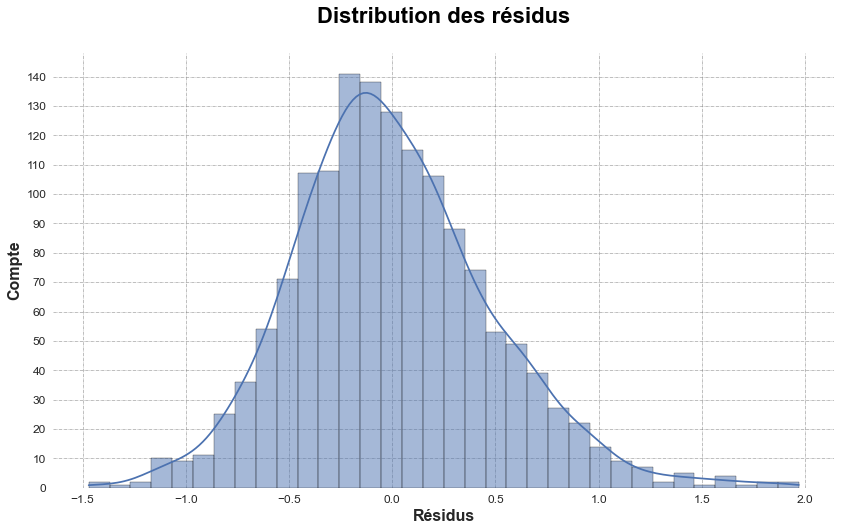

In [29]:
# Creation d'une colonne contenant les residus:
bil_6_df["residual"] = bil_6_df["margin_low"] - bil_6_df["margin_low_pred"]

# Visualiser
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (14,8))
ax.set_title("Distribution des résidus",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')

sns.histplot(bil_6_df["residual"], kde=True)
plt.ylabel("Compte", weight='bold', size=16)
plt.xlabel("Résidus", weight='bold', size=16)
plt.yticks(np.arange(0, 150, 10))
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

In [30]:
# Norlamite Test de Shapiro-Wilk
print("La p-value du test de Shapiro-Wilk :", shapiro(reg_multi.resid))

La p-value du test de Shapiro-Wilk : ShapiroResult(statistic=0.9857879281044006, pvalue=8.536943374437556e-11)


Une p-value inférieure au seuil alpha  5 %, pour le test de Shapiro-Wilk indique que l'hypothèse nulle  𝐻0  de normalité de la distribution des résidus est rejetée, les résidus suivent une distribution Normale.

### Testez l’homoscédasticité

In [31]:
# Tester l'homoscédasticité
# On va tester la constance de la variance des résidus : Test Breusch Pagan
nombres = ['Test Statistic', 'p-value', 'F-Statistic', 'F-Test p-value']
test = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, reg_multi.model.exog)

In [32]:
test

(80.16261280172895,
 7.759535216275702e-16,
 16.892358846148674,
 2.922749656653571e-16)

La p-valeur ici est inférieure à  5 %, on rejette l'hypothèse  𝐻0  selon laquelle les variances sont constantes (l'hypothèse d’homoscédasticité).

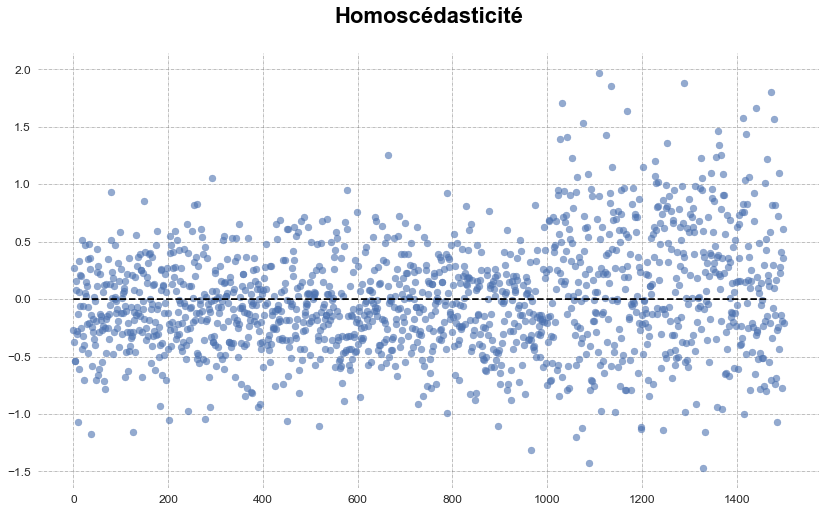

In [33]:
# Visualiser
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (14,8))
ax.set_title("Homoscédasticité",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.scatter(x = bil_6_df.index, y = bil_6_df["residual"], alpha=0.6)
plt.plot(np.repeat(0, len(bil_6_df.index)+2), color="black", linestyle='--')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

La répartition semble aléatoire sur le graphique. Cette forme de cône que peut prendre la répartition des résidus en fonction d'une variable explicative.

### Colinéarité des variables

In [34]:
variables = reg_multi.model.exog
[variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]

[1.0136128990686302,
 1.138260573608248,
 1.2301145155560367,
 1.4044037781843626,
 1.5769501453665806]

Tous les coefficients sont inférieurs à 10, il n'y a donc pas de problème de colinéarité.

### Identification des individus atypiques et influents

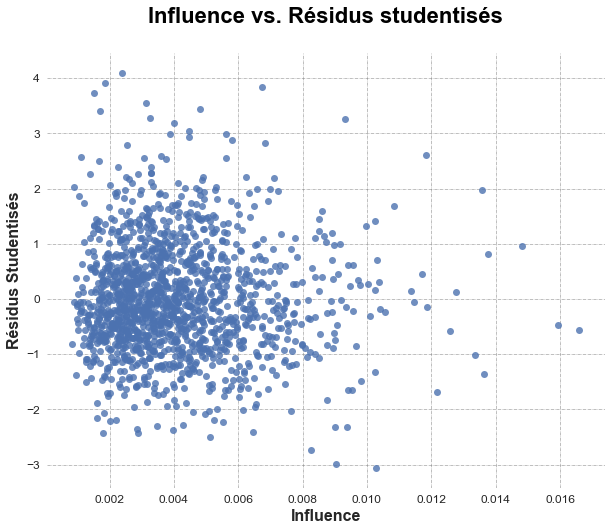

margin_low  dfb_Intercept  dfb_diagonal  dfb_height_left  dfb_height_right  \
0        4.52       0.038028      0.011150        -0.040676         -0.050650   
1        3.77      -0.047734      0.031782         0.040802          0.006819   
2        4.40      -0.028752      0.034142         0.027975         -0.020340   
3        3.62      -0.031981      0.060924         0.001406         -0.016400   
4        4.04      -0.025618      0.021411        -0.027128          0.056039   

   dfb_margin_up  dfb_length   cooks_d  standard_resid  leverage  \
0       0.028339   -0.018016  0.000894       -0.563593  0.016606   
1       0.006051    0.006096  0.000597       -0.769710  0.006015   
2      -0.010975   -0.001295  0.000457        0.572488  0.008298   
3       0.006425   -0.029579  0.000936       -1.118681  0.004467   
4      -0.049448   -0.009670  0.001171       -1.121058  0.005558   

   dffits_internal  student_resid    dffits  
0        -0.073239      -0.563461 -0.073221  
1        -0.059874      -0.769603 -0.059866  
2         0.052367       0.572356  0.052355  
3        -0.074934      -1.118778 -0.074940  
4        -0.083813      -1.121157 -0.083821

In [35]:
# résidus studentisés
student_resid = reg_multi.get_influence().resid_studentized_external
(cooks, p_val_cooks) = reg_multi.get_influence().cooks_distance
(dffits, p_val_dffits) = reg_multi.get_influence().dffits
leverage = reg_multi.get_influence().hat_matrix_diag

# Visualiser
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (10,8))
ax.set_title("Influence vs. Résidus studentisés",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
sns.regplot(x = leverage, y = reg_multi.resid_pearson, fit_reg=False)
plt.ylabel("Résidus Studentisés", weight='bold', size=16)
plt.xlabel("Influence", weight='bold', size=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Creation une nouvelle dataframe
df = pd.concat([bil_6_df["margin_low"], reg_multi.get_influence().summary_frame()], axis = 1)
df = df.rename(columns={"hat_diag": "leverage"})
df.head()

Ici, on a les donnés avec les influences. On va analyser suivantes.

In [36]:
alpha = 0.05
# n: le nombre d'individus de l'échantillon
# p: le nombre de variables
n = bil_6_df.shape[0]
p = 6

In [37]:
#Créer une nouvelle dataframe
dt_n = pd.DataFrame({'obs':np.arange(1, n+1)})

### Calculer les leviers  

en sachant que le seuil des leviers est de 2∗p/n .

In [38]:
dt_n['levier'] = reg_multi.get_influence().hat_matrix_diag
seuil_levier = 2*p/n

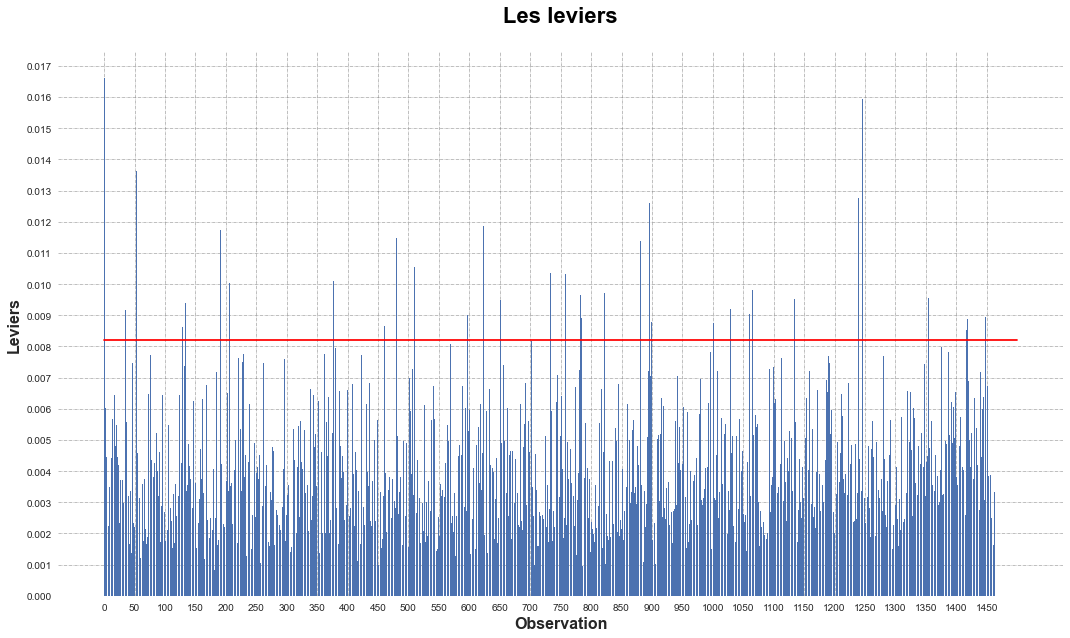

In [39]:
#On peut visualiser les leviers pour chaque point:

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Les leviers",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.bar(dt_n['obs'], dt_n['levier'])
plt.xticks(np.arange(0, 1500, step=50))
plt.ylabel("Leviers", weight='bold', size=16)
plt.xlabel("Observation", weight='bold', size=16)
plt.yticks(np.arange(0, 0.2, 0.001))
plt.plot([0, 1500], [seuil_levier, seuil_levier], color='r')
plt.show()

In [40]:
# Pour sélectionner les points pour lesquels le levier est supérieur au seuil
dt_n.loc[dt_n['levier'] > seuil_levier, :]

obs    levier
0        1  0.016606
2        3  0.008298
34      35  0.009156
52      53  0.013635
56      57  0.009087
...    ...       ...
1416  1417  0.008521
1417  1418  0.008870
1428  1429  0.008390
1441  1442  0.009325
1447  1448  0.008931

[75 rows x 2 columns]

### Calculez les résidus studentisés

Si l'on souhaite maintenant calculer les résidus studentisés, nous écrivons ceci, sachant que le seuil pour les résidus studentisés est une loi de Student à n-p-1 degrés de liberté :

In [41]:
dt_n['rstudent'] = reg_multi.get_influence().resid_studentized_internal
seuil_rstudent = t.ppf(1-alpha/2, n-p-1)

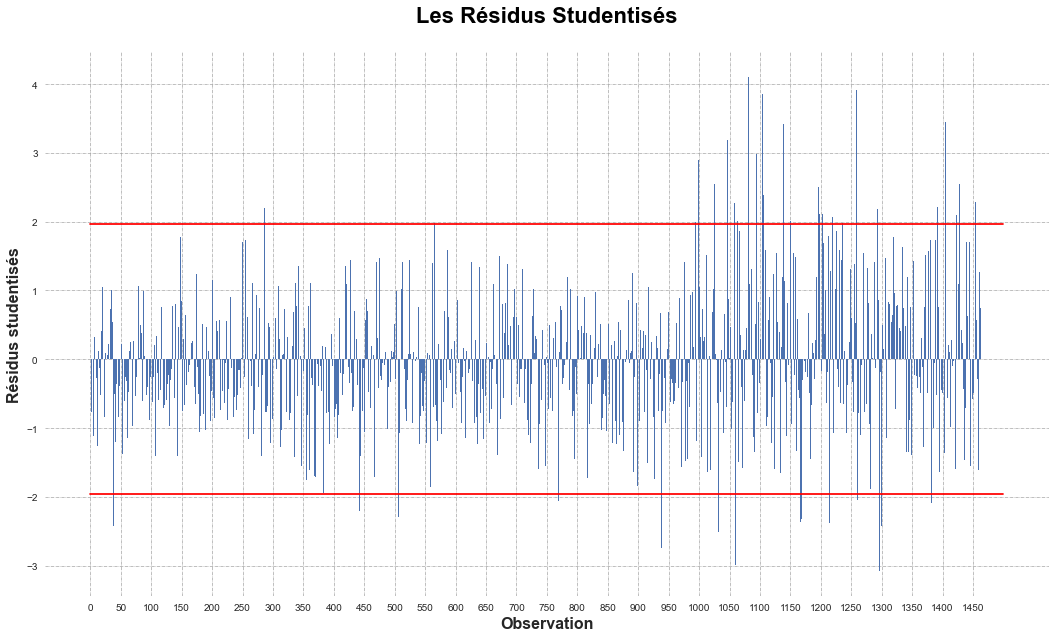

In [42]:
# Visualisons les résidus studentisés :

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("Les Résidus Studentisés",
 fontsize=22, weight='bold', color='Black', loc='center', pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.bar(dt_n['obs'], dt_n['rstudent'])
plt.xticks(np.arange(0, 1500, step=50))
plt.ylabel("Résidus studentisés", weight='bold', size=16)
plt.xlabel("Observation", weight='bold', size=16)
plt.yticks(np.arange(-5, 5, 1))
plt.plot([0, 1500], [seuil_rstudent, seuil_rstudent], color='r')
plt.plot([0, 1500], [-seuil_rstudent, -seuil_rstudent], color='r')
plt.show()

### 2.3.2. Déterminez la distance de Cook

In [43]:
# Pour trouver la distance de Cook
influence = reg_multi.get_influence().summary_frame()
influence.head()

dfb_Intercept  dfb_diagonal  dfb_height_left  dfb_height_right  \
0       0.038028      0.011150        -0.040676         -0.050650   
1      -0.047734      0.031782         0.040802          0.006819   
2      -0.028752      0.034142         0.027975         -0.020340   
3      -0.031981      0.060924         0.001406         -0.016400   
4      -0.025618      0.021411        -0.027128          0.056039   

   dfb_margin_up  dfb_length   cooks_d  standard_resid  hat_diag  \
0       0.028339   -0.018016  0.000894       -0.563593  0.016606   
1       0.006051    0.006096  0.000597       -0.769710  0.006015   
2      -0.010975   -0.001295  0.000457        0.572488  0.008298   
3       0.006425   -0.029579  0.000936       -1.118681  0.004467   
4      -0.049448   -0.009670  0.001171       -1.121058  0.005558   

   dffits_internal  student_resid    dffits  
0        -0.073239      -0.563461 -0.073221  
1        -0.059874      -0.769603 -0.059866  
2         0.052367       0.572356  0.052355  
3        -0.074934      -1.118778 -0.074940  
4        -0.083813      -1.121157 -0.083821

In [44]:
# Le seuil de la distance de Cook est de n-p :

dt_n['dcooks'] = influence['cooks_d']
seuil_dcook = 4/(n-p)

In [45]:
# Détecter les observations influentes 

dt_n.loc[dt_n['dcooks'] > seuil_dcook, :]

obs    levier  rstudent    dcooks
52      53  0.013635 -1.372229  0.004338
80      81  0.003806  0.022997  0.003151
125    126  0.001589  0.172284  0.006308
243    244  0.002601  0.239331  0.004207
292    293  0.002852  0.522537  0.005768
...    ...       ...       ...       ...
1420  1421  0.006084 -1.590104  0.005875
1426  1427  0.005088 -1.669093  0.005099
1441  1442  0.009325  3.280337  0.009596
1450  1451  0.006730 -0.493361  0.003099
1459  1460  0.005672 -0.389864  0.003050

[79 rows x 4 columns]

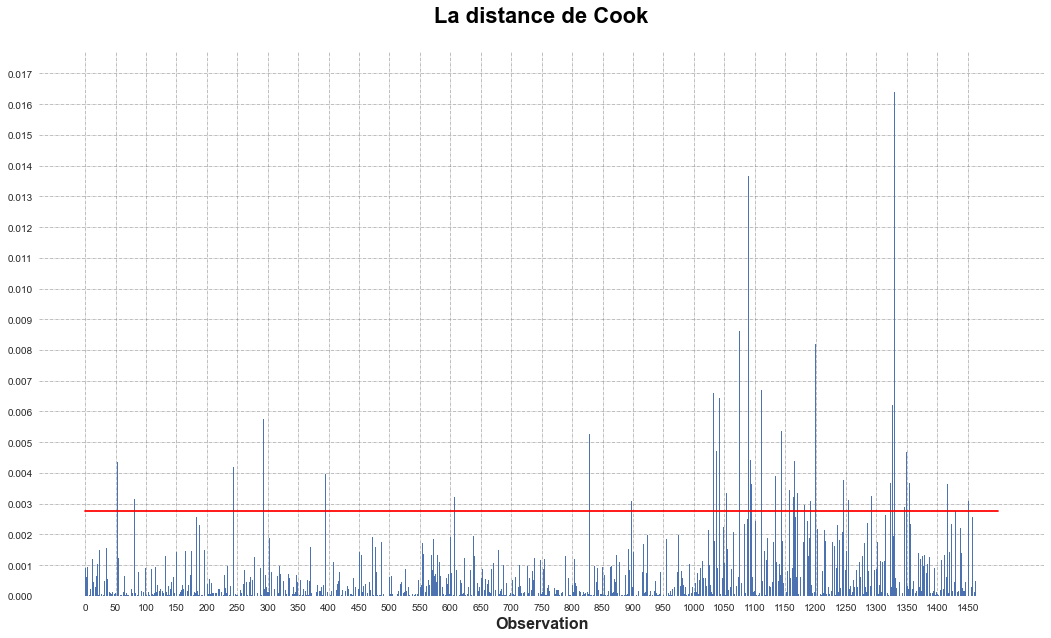

In [46]:
# Visualiser:

plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (18,10))
ax.set_title("La distance de Cook",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
plt.bar(dt_n['obs'], dt_n['dcooks'])
plt.xticks(np.arange(0, 1500, step=50))
#plt.ylabel("Leviers", weight='bold', size=16)
plt.xlabel("Observation", weight='bold', size=16)
plt.yticks(np.arange(0, 0.02, 0.001))
plt.plot([0, 1500], [seuil_dcook, seuil_dcook], color='r')
plt.show()

On ne retire des valeurs anormaux

In [47]:
# valuer outlier
std_res = df.student_resid
outlier = pd.DataFrame((df["margin_low"][abs(std_res) > seuil_rstudent]))
print ("Résidus studentisés:\n", std_res.describe())
print("Nombre outliers:", outlier.count())
print("\n")
# Identification des individus a forte influence
hi_influ = df["margin_low"][abs(df["leverage"]) > seuil_levier]
print(df["leverage"].describe())
print("Nombre d'individus à forte influence:", hi_influ.count())

Résidus studentisés:
 count    1463.000000
mean        0.000133
std         1.001419
min        -3.087577
25%        -0.660578
50%        -0.086814
75%         0.570403
max         4.127099
Name: student_resid, dtype: float64
Nombre outliers: margin_low    79
dtype: int64


count    1463.000000
mean        0.004101
std         0.002134
min         0.000840
25%         0.002561
50%         0.003645
75%         0.005140
max         0.016606
Name: leverage, dtype: float64
Nombre d'individus à forte influence: 75


In [48]:
# Identification des individus anormal avec une forte influence:
outliers_hi_influ =pd.merge(outlier, hi_influ, left_index=True, right_index=True)
print(outliers_hi_influ.count())
print("\n")
print(outliers_hi_influ)

margin_low_x    8
margin_low_y    8
dtype: int64


      margin_low_x  margin_low_y
664           5.04          5.04
965           3.45          3.45
1022          6.03          6.03
1074          4.36          4.36
1089          3.86          3.86
1199          4.49          4.49
1329          3.82          3.82
1478          6.08          6.08


**Il y a 8 individuus: influents + anormal. Il faut retirer les et relancer la régression linéaire.**

In [49]:
# Suppression 
df = bil_6_df.dropna()
bil_sans_df_n = df.drop(outliers_hi_influ.index)

reg_multi_sans_df_n = smf.ols('margin_low ~ diagonal + height_left + height_right + margin_up + length', data = bil_sans_df_n).fit()
print(reg_multi_sans_df_n.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     281.5
Date:                Sat, 03 Dec 2022   Prob (F-statistic):          1.45e-210
Time:                        20:14:11   Log-Likelihood:                -969.98
No. Observations:                1455   AIC:                             1952.
Df Residuals:                    1449   BIC:                             1984.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       24.9633      9.511      2.625   

Le R² (ajusté ou non) augmente légèrement (0.47 à 0.49) -> on peut les garder!

In [50]:
bil_test_df = bil_test_df.copy()
bil_test_df.loc[:,"margin_low"] = round(reg_multi.predict({'diagonal': bil_test_df['diagonal'], 
                                               'height_left': bil_test_df['height_left'], 
                                               'height_right': bil_test_df['height_right'], 
                                               'margin_up': bil_test_df['margin_up'], 
                                               'length': bil_test_df['length']}),2)
bil_test_df.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
72         True    171.94       103.89        103.45        4.32       3.25   
99         True    171.93       104.07        104.18        4.39       3.14   
151        True    172.07       103.80        104.38        4.41       3.02   
197        True    171.45       103.66        103.80        4.32       3.62   
241        True    171.83       104.14        104.06        4.65       3.02   

     length  
72   112.79  
99   113.08  
151  112.93  
197  113.27  
241  112.36

## 3. Application du modèle

In [51]:
#Données sans valeurs nulles
df1 = bil.dropna()

#Données avec des valeurs nulles
df2 = bil.loc[bil['margin_low'].isnull(),:].copy()

#Application du modèle
df2.loc[:,"margin_low"] = round(reg_multi.predict({'diagonal': df2['diagonal'], 
                                               'height_left': df2['height_left'], 
                                               'height_right': df2['height_right'], 
                                               'margin_up': df2['margin_up'], 
                                               'length': df2['length']}),2)
# Concatenation:
reg_multi_result = [df1, df2]
df_final = pd.concat(reg_multi_result)
df_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54

In [52]:
# describe
df_final.describe()

is_genuine     diagonal  height_left  height_right   margin_low  \
count  1463.000000  1463.000000  1463.000000   1463.000000  1463.000000   
mean      0.663705   171.959193   104.031333    103.921476     4.485967   
std       0.472603     0.305457     0.299605      0.324181     0.663813   
min       0.000000   171.040000   103.140000    102.910000     2.980000   
25%       0.000000   171.750000   103.825000    103.710000     4.015000   
50%       1.000000   171.960000   104.040000    103.920000     4.310000   
75%       1.000000   172.170000   104.230000    104.150000     4.870000   
max       1.000000   173.010000   104.880000    104.950000     6.900000   

         margin_up       length  
count  1463.000000  1463.000000  
mean      3.153083   112.674757  
std       0.231466     0.873222  
min       2.270000   109.490000  
25%       2.990000   112.020000  
50%       3.140000   112.960000  
75%       3.315000   113.340000  
max       3.910000   114.320000

## 4. Analyse descriptive

            diagonal  height_left  height_right  margin_low  margin_up  length
is_genuine                                                                    
0                492          492           492         492        492     492
1                971          971           971         971        971     971


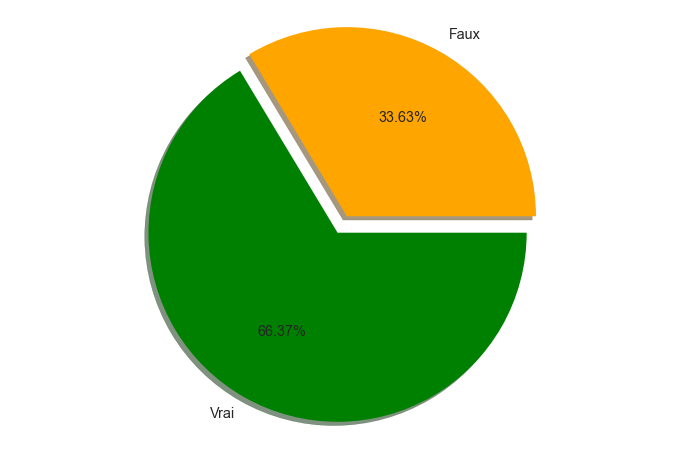

In [53]:
# Repartition des vrais/faux billets
print(df_final.groupby(["is_genuine"]).count())

# Visualisation
fig1, ax1 = plt.subplots(figsize = (12,8))
ax.set_title("Répartition des billets",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(False)
ax1.pie(df_final.groupby(["is_genuine"])["diagonal"].count(),
        labels=["Faux","Vrai"],
        explode= (0, 0.1), 
        autopct="%1.2f%%",
        textprops={'size': 'x-large'},
        colors=["#FFA500","#008000"],
        shadow=True)
ax1.axis("equal")
plt.show()

In [54]:
print(df_final.groupby(["is_genuine"]).mean())

              diagonal  height_left  height_right  margin_low  margin_up  \
is_genuine                                                                 
0           171.901402   104.188537    104.143272    5.215935   3.351504   
1           171.988476   103.951679    103.809094    4.116097   3.052544   

                length  
is_genuine              
0           111.632114  
1           113.203059  


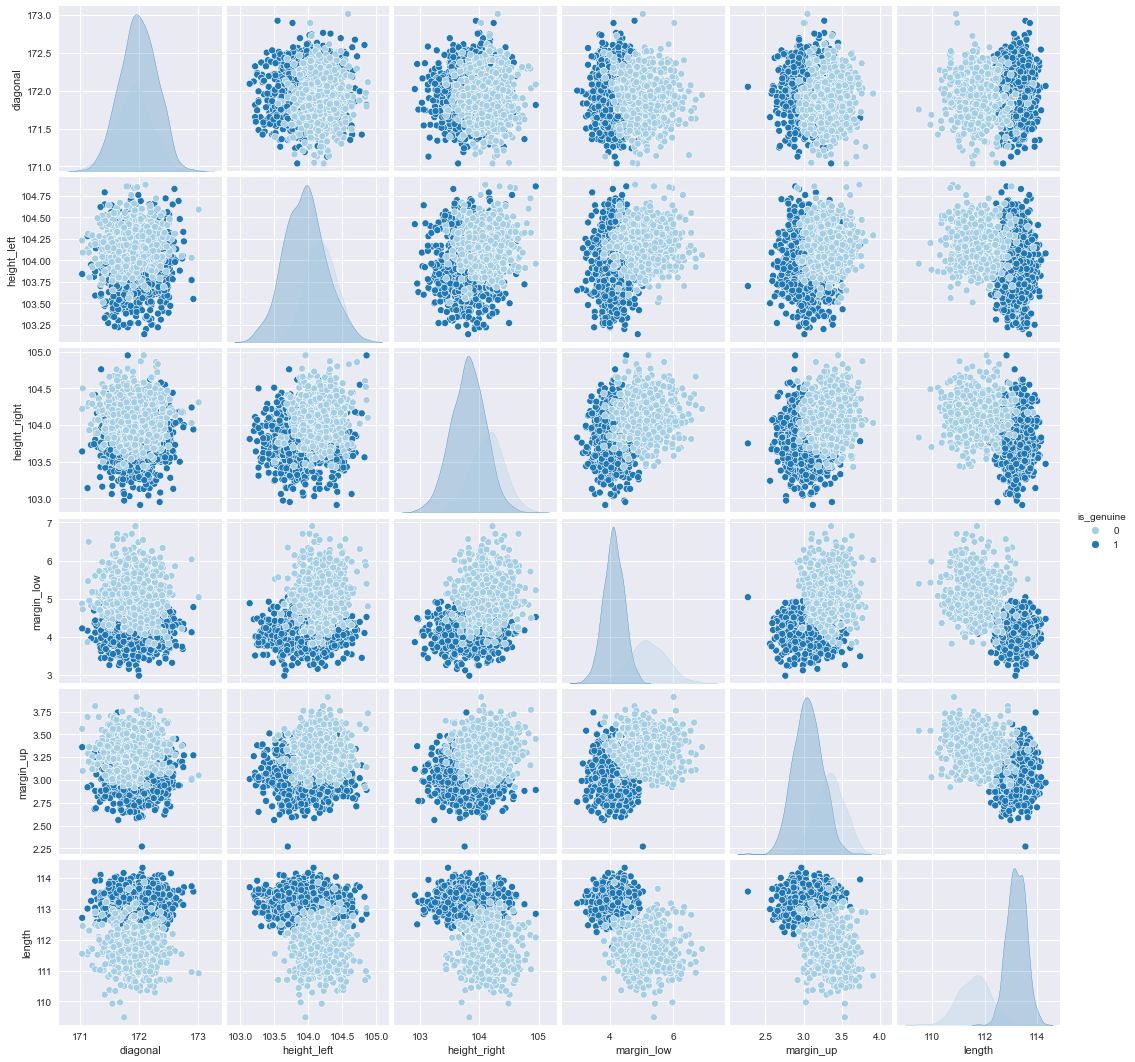

In [55]:
# Visualiser par par plot
sns.pairplot(df_final, hue="is_genuine", palette="Paired")
plt.show()

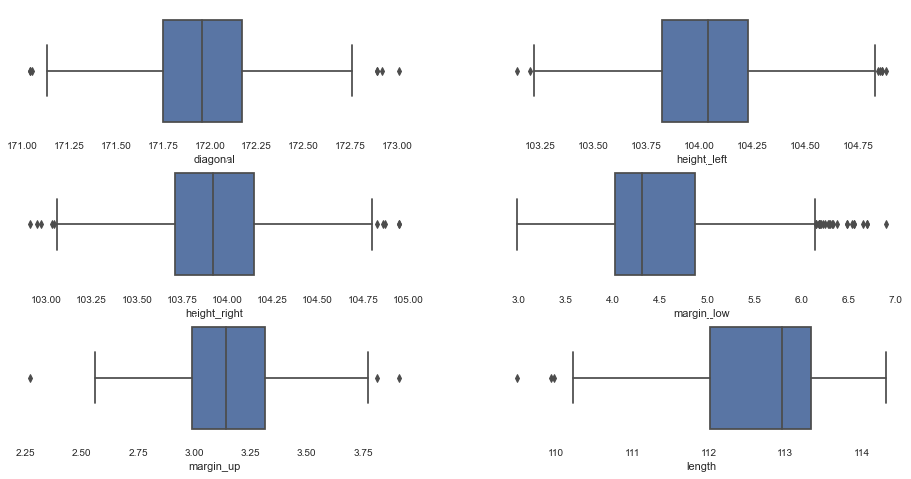

In [56]:
# Box plot
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (16, 8))
a = 3; b = 2; c = 1
for i in df_final.loc[:, df_final.columns != "is_genuine"]:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.boxplot(x = df_final[i])
    c = c + 1
    plt.box(False)
plt.show()

### K-means

In [57]:
# Nombre de clusters:
n_clust = 2

# Centrage et Réduction
kmeans2 = KMeans(n_clusters = n_clust)
x_Kmeans2 = kmeans2.fit_transform(df_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

In [58]:
# Créer une nouvelle colonne
clusters_km = kmeans2.labels_
centroids_km = kmeans2.cluster_centers_

In [59]:
# Nombre de points par groupes
pd.Series(clusters_km).value_counts()

1    988
0    475
dtype: int64

In [60]:
kmeans2.cluster_centers_

array([[171.89936709, 104.19130802, 104.14508439,   5.24105485,
          3.3500211 , 111.58843882],
       [171.98786653, 103.95466127, 103.81430738,   4.12407482,
          3.05869565, 113.19539939]])

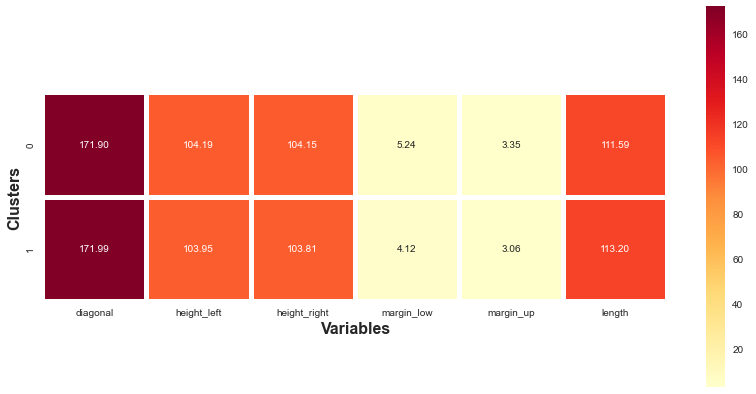

In [61]:
billets_centroid_df = pd.DataFrame(centroids_km, columns=df[["diagonal","height_left","height_right","margin_low","margin_up","length"]].columns)
fig2 = billets_centroid_df
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(fig2, linewidth=5, annot = True, fmt='.2f', cmap="YlOrRd", cbar_kws={"shrink": 0.5}, square=True)
plt.ylabel("Clusters",weight='bold',size=16)
plt.xlabel("Variables",weight='bold',size=16)
#fig.savefig("output.png")
plt.show()

### ACP

In [62]:
# Préparation des données pour le Clustering
data = (df_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]]).values
index = df_final.index
features = (df_final[["diagonal","height_left","height_right","margin_low","margin_up","length"]]).columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(data)
X_scaled = std_scale.transform(data)

In [63]:
# choix du nombre de composantes à calculer
n_comp = 6

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=6)

In [64]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : pca.explained_variance_,
        "Variance expliquée (%)" : np.round(pca.explained_variance_ratio_ * 100,1),
        "Cum. var. expliquée (%)" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100,1)
    }
)
eig

Dimension  Variance expliquée  Variance expliquée (%)  \
0      Dim1            2.589181                    43.1   
1      Dim2            1.018936                    17.0   
2      Dim3            0.788724                    13.1   
3      Dim4            0.708014                    11.8   
4      Dim5            0.577616                     9.6   
5      Dim6            0.321632                     5.4   

   Cum. var. expliquée (%)  
0                     43.1  
1                     60.1  
2                     73.2  
3                     85.0  
4                     94.6  
5                    100.0

In [65]:
# projeter X sur les composantes principales
X_projected = pca.transform(X_scaled)

# Transformation en DataFrame pandas
data_pca_df = pd.DataFrame({
    "Dim1" : X_projected[:,0], 
    "Dim2" : X_projected[:,1],
    "Genuine" : index
})

# Résultat (premières lignes)
data_pca_df.head()

Dim1      Dim2  Genuine
0  1.627035  0.807294        0
1 -2.017133 -2.217975        1
2 -0.996369  2.596334        2
3 -1.379560 -1.809941        3
4  0.138409 -0.597355        4

In [66]:
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

In [67]:
# Calcul des composantes principales
n_comp = 2
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=2)

In [68]:
# Fonction qui me permet d'afficher les cercles de corrélations
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(8,8))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:],
                   angles='xy', scale_units='xy', scale=1, color="orange")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
           
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
           
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
       
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

In [69]:
#Fonction qui me permet de projeter mes individus sur un plan
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure      
            fig = plt.figure(figsize=(7,6))
       
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center')
               
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
       
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)


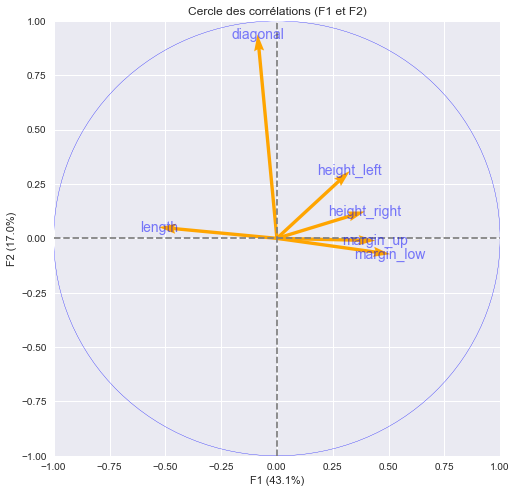

In [70]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

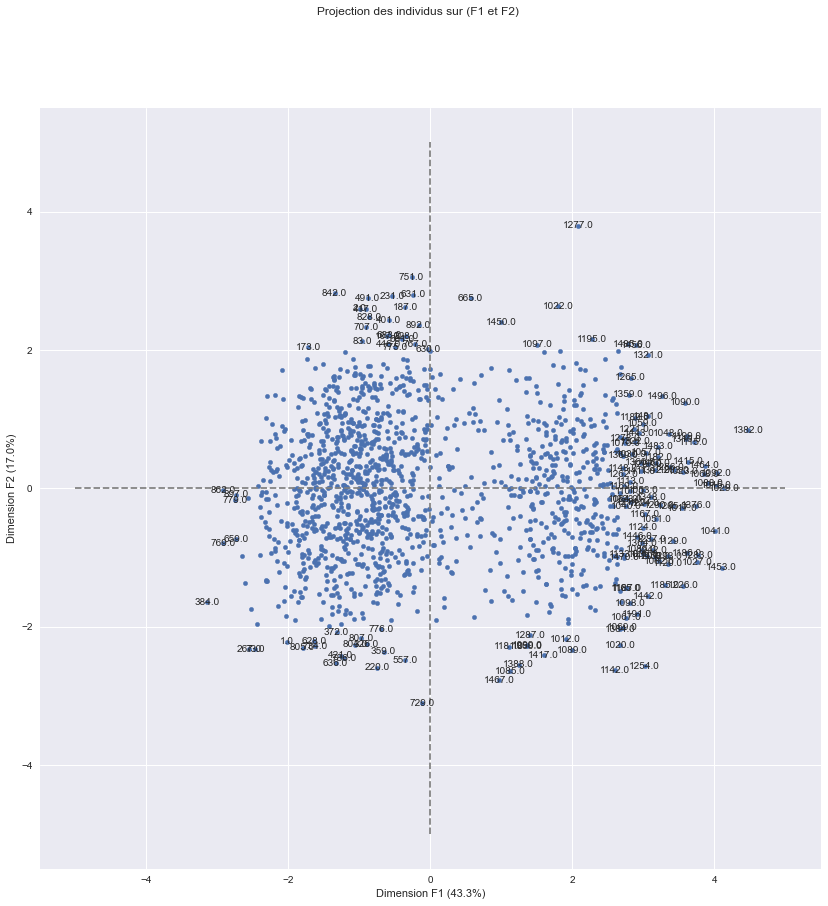

In [71]:
# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots(figsize=(14,14))
data_pca_df.plot.scatter("Dim1", "Dim2", ax = ax) # l'option ax permet de placer les points et le texte sur le même graphique

# boucle sur chaque pays
for k in data_pca_df.iterrows():
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[1]['Dim1']) > 2.7) | (abs(k[1]['Dim2']) > 2):
        ax.annotate(k[1]["Genuine"], (k[1]['Dim1'], k[1]['Dim2']), fontsize = 10, ha='center',va='center')

# affichage des lignes horizontales et verticales
plt.plot([-5, 5], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-5, 5], color='grey', ls='--')
        
plt.xlabel("Dimension F1 (43.3%)") 
plt.ylabel("Dimension F2 (17.0%)")
plt.suptitle("Projection des individus sur (F1 et F2)")
plt.show()

In [72]:
data_pca_k = data_pca_df.assign(classe = kmeans2.labels_)
data_centroid = data_pca_k.drop(columns = ["Genuine", "classe"])

kmeansacp = KMeans(n_clusters = 2)
kmeansacp.fit(data_centroid)

KMeans(n_clusters=2)

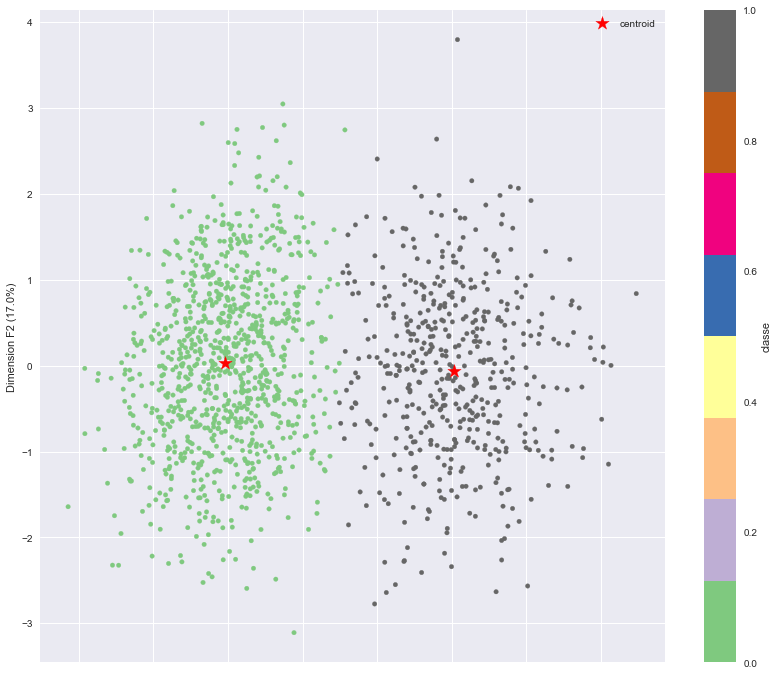

In [73]:
data_pca_k2 = data_pca_df.assign(classe = kmeansacp.labels_)
data_pca_k2.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent", figsize=(14,12))
plt.scatter(kmeansacp.cluster_centers_[:,0],kmeansacp.cluster_centers_[:,1], color='red', marker='*', s=200, label='centroid')
plt.legend()
plt.xlabel("Dimension F1 (43.3%)") 
plt.ylabel("Dimension F2 (17.0%)")
plt.show()

In [74]:
#Verification de la classification: Matrice de confusion:
clusters_km2 = kmeansacp.labels_
km_matrix = pd.crosstab(clusters_km2, df_final["is_genuine"])
print(km_matrix)

is_genuine    0    1
row_0               
0            12  957
1           480   14


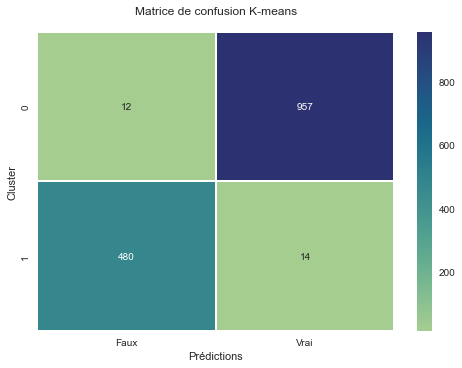

In [75]:
# Graphique:
sns.heatmap(km_matrix, annot = True, fmt = ".3g", cmap = sns.color_palette("crest", as_cmap=True), linecolor = "white", linewidths = 0.3,
            xticklabels = ["Faux","Vrai"],
            yticklabels=["0","1"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Cluster")
plt.title("Matrice de confusion K-means\n")
plt.show()

**Notre classification n'est pas parfaite, le premier groupe "Cluster 1" semble correspondre à des faux billets, groupe "Cluster 0" semble correspondre à de vrais billets**

### Prédictions K-means

In [76]:
# Predictions sur des donnees inconnues:
x_test_km = billets_prod[["diagonal","height_left","height_right","margin_low","margin_up","length"]]

billets_prod["cluster_pred"] = kmeans2.predict(x_test_km)
print(billets_prod[["id","cluster_pred"]])

    id  cluster_pred
0  A_1             0
1  A_2             0
2  A_3             0
3  A_4             1
4  A_5             1


**Les 3 premiers billets appartiennent au cluster 0, qui sont le groupe des faux billets, et les 2 derniers appartiennent au cluster 1, des vrais billets!!**

## 5. Régression Logistique

### 5.1. Visualisation et ordre des données

In [77]:
# y vrais: 
y_billet = df_final.loc[:, df_final.columns == "is_genuine"]
print(y_billet.value_counts())
print("\n")
# X (les autres):
X_billet = df_final.loc[:, df_final.columns != "is_genuine"]
X_billet = sm.tools.add_constant(X_billet)
print(X_billet.head())

is_genuine
1             971
0             492
dtype: int64


   const  diagonal  height_left  height_right  margin_low  margin_up  length
0    1.0    171.81       104.86        104.95        4.52       2.89  112.83
1    1.0    171.46       103.36        103.66        3.77       2.99  113.09
2    1.0    172.69       104.48        103.50        4.40       2.94  113.16
3    1.0    171.36       103.91        103.94        3.62       3.01  113.51
4    1.0    171.73       104.28        103.46        4.04       3.48  112.54


### 5.2. Regression logistique

In [78]:
# Regression logistique:
reg_log = Logit(endog=y_billet, exog=X_billet)
# Calculs:
res_log = reg_log.fit()
# Resume des resultats:
print(res_log.summary())

Optimization terminated successfully.
         Current function value: 0.026765
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1463
Model:                          Logit   Df Residuals:                     1456
Method:                           MLE   Df Model:                            6
Date:                Sat, 03 Dec 2022   Pseudo R-squ.:                  0.9581
Time:                        20:14:17   Log-Likelihood:                -39.158
converged:                       True   LL-Null:                       -934.20
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -243.4159    249.370     -0.976      0.329    -732.172     245.340
diagonal         0.402

**Il y a des variables x non-significatives au seuil alpha 5 %, on recommence la régression sans ces variables (diagonal, height_left).**

### 5.3. Régression logistique des variables significatives

In [79]:
# On ne garde que les variables significatives a alpha = 5% dans X_Billet:
X_billet = df_final[["height_right","margin_low", "margin_up", "length"]]
X_billet = sm.add_constant(X_billet)

# On recommence la regression logistique:
reg_log = Logit(endog=y_billet, exog=X_billet)

# Creation du modele:
model_reg_log = reg_log.fit()

# Resume des resultats:
print(model_reg_log.summary2())

Optimization terminated successfully.
         Current function value: 0.027189
         Iterations 13
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.957   
Dependent Variable:  is_genuine       AIC:              89.5549 
Date:                2022-12-03 20:14 BIC:              115.9961
No. Observations:    1463             Log-Likelihood:   -39.777 
Df Model:            4                LL-Null:          -934.20 
Df Residuals:        1458             LLR p-value:      0.0000  
Converged:           1.0000           Scale:            1.0000  
No. Iterations:      13.0000                                    
----------------------------------------------------------------
               Coef.   Std.Err.    z    P>|z|    [0.025   0.975]
----------------------------------------------------------------
const        -258.7502 143.3183 -1.8054 0.0710 -539.6488 22.1485
height_right   -3.5542   1.1885 -2.9904 0.0028   -5.8837 -1.2247
margin_low  

- P-value est inférieure à 0.05, le modèle est significatif.
- Le R² est très proche de 1, notre modèle explique donc la majorité de la variance observée.

### 5.4. Test d'hypothèses

### Test binarite

La régression logistique binaire nécessite que la variable dépendante soit binaire. Ici is_genuine ne peut prendre que deux valeurs, l'hypothèse est vérifiée.

In [80]:
print(df_final["is_genuine"].nunique())

2


Il n'y a bien que deux valeurs possibles pour la variable prédite.

### Multicollinearite

In [81]:
vif= pd.Series([variance_inflation_factor(X_billet.values, i)
               for i in range(X_billet.shape[1])],
              index=X_billet.columns)
print("VIF par features:\n", vif)
print("VIF moyen:",vif.mean())

VIF par features:
 const           187159.848539
height_right         1.247632
margin_low           1.883516
margin_up            1.412027
length               2.103478
dtype: float64
VIF moyen: 37433.29903837327


**Interpération**
- Une valeur de 1 indique qu'il n'y a pas de corrélation entre une variable explicative donnée et toute autre variable explicative du modèle.

- Une valeur entre 1 et 5 indique une corrélation modérée entre une variable explicative donnée et d'autres variables explicatives dans le modèle, mais cela n'est souvent pas assez grave pour nécessiter une attention particulière.

- Une valeur supérieure à 5 indique une corrélation potentiellement sévère entre une variable explicative donnée et d'autres variables explicatives du modèle -> Les estimations des coefficients et les valeurs de p dans la sortie de la régression ne sont probablement pas fiables.

**Aucune des variables n'a de VIF supérieur à 5. Il n'y a donc pas de collinéarité**

## 6. Application du modèle

In [82]:
# Application du modelé sur les données training:
df_final["proba"] = model_reg_log.predict(X_billet)
df_final["y_pred"] = (model_reg_log.predict(X_billet) >= 0.5).astype(int)
df_final.head()

is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           1    171.81       104.86        104.95        4.52       2.89   
1           1    171.46       103.36        103.66        3.77       2.99   
2           1    172.69       104.48        103.50        4.40       2.94   
3           1    171.36       103.91        103.94        3.62       3.01   
4           1    171.73       104.28        103.46        4.04       3.48   

   length     proba  y_pred  
0  112.83  0.873599       1  
1  113.09  0.999992       1  
2  113.16  0.999912       1  
3  113.51  0.999999       1  
4  112.54  0.909772       1

### Evaluation du modèle

[[32.26666667  0.53333333]
 [ 0.2        64.53333333]]


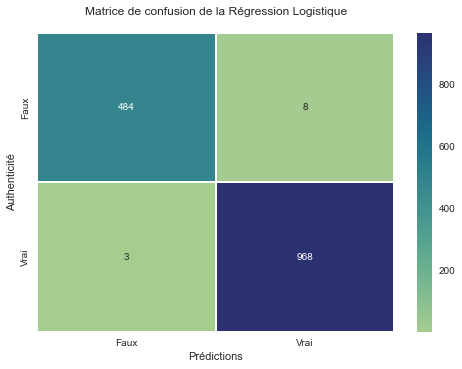

In [83]:
# Matrice de confusion:
n_reg_lin = 1500
conf_matrix_reg_log = model_reg_log.pred_table()
prct = (conf_matrix_reg_log*100)/n_reg_lin
print(prct)

# Graphique:
sns.heatmap(conf_matrix_reg_log, annot = True, fmt = ".3g", cmap = sns.color_palette("crest", as_cmap=True),
            linecolor = "white", linewidths = 0.3, xticklabels = ["Faux","Vrai"], yticklabels=["Faux","Vrai"]
            )
plt.xlabel("Prédictions")
plt.ylabel("Authenticité")
plt.title("Matrice de confusion de la Régression Logistique\n")
plt.show()

### Score de classification de précision

In [84]:
#Score de classification de précision.
#Dans la classification multiétiquette, cette fonction calcule la précision du sous-ensemble :
#l'ensemble d'étiquettes prédit pour un échantillon doit correspondre exactement à l'ensemble d'étiquettes correspondant dans y_true.
print("Accuracy Score: ", accuracy_score(df_final["is_genuine"], df_final["y_pred"]))

#La précision est le rapport tp / (tp + fp) où tp est le nombre de vrais positifs et fp le nombre de faux positifs.
#Le ratio de vrais positifs sur le total des prédictions positives.
print("Precision Score: ", precision_score(df_final["is_genuine"], df_final["y_pred"]))

#Le rappel est le rapport tp / (tp + fn) où tp est le nombre de vrais positifs et fn le nombre de faux négatifs.
#Le ratio de positif prédit correctement parmi tous les positifs. 
print("Recall Score: ", recall_score(df_final["is_genuine"], df_final["y_pred"]))

#Le score F1 peut être interprété comme une moyenne harmonique de la précision et du rappel, 
#où un score F1 atteint sa meilleure valeur à 1 et son pire score à 0.
print("Score F1: ", f1_score(df_final["is_genuine"], df_final["y_pred"]))

Accuracy Score:  0.9924812030075187
Precision Score:  0.9918032786885246
Recall Score:  0.9969104016477858
Score F1:  0.9943502824858756


In [85]:
print(classification_report(df_final["is_genuine"], df_final["y_pred"]))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       492
           1       0.99      1.00      0.99       971

    accuracy                           0.99      1463
   macro avg       0.99      0.99      0.99      1463
weighted avg       0.99      0.99      0.99      1463



**Ce modèle est quasiment parfait puisque tous les scores s'approchent de 1**

### Courbe R.O.C.

- La courbe ROC est une mesure de la performance d’un classificateur binaire. 
- On représente la mesure ROC sous la forme d'une courbe qui donne le taux de vrais positifs en fonction du taux de faux positifs.

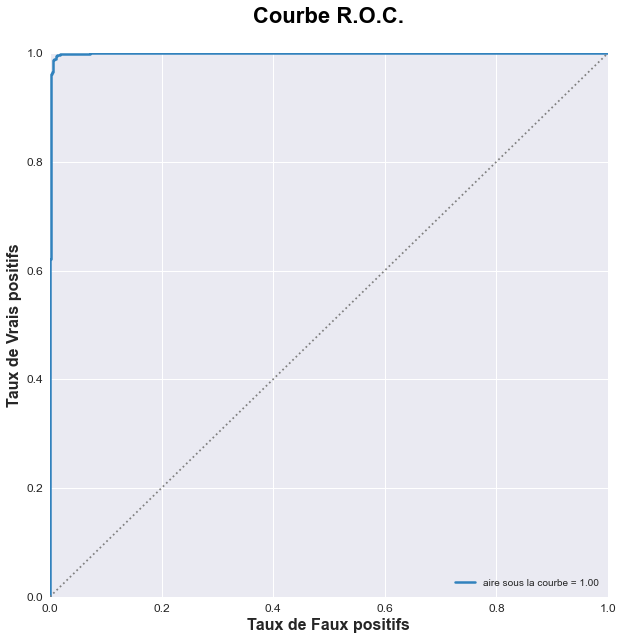

In [86]:
# Courbe R.O.C.:
fpr, tpr, _ = roc_curve(df_final["is_genuine"], df_final["proba"])
roc_auc = roc_auc_score(df_final["is_genuine"], df_final["proba"])

# Graphique:
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Courbe R.O.C.",
 fontsize=22, weight='bold', color='Black', loc='center',pad=30)
plt.box(True)

plt.plot(fpr, tpr, color="#3182bd", linewidth=2.5, label="aire sous la courbe = %0.2f" % roc_auc)
plt.plot([0, 1], [0, 1],color="grey", linestyle=":")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = "lower right")
plt.ylabel("Taux de Vrais positifs", weight='bold', size=16)
plt.xlabel("Taux de Faux positifs", weight='bold', size=16)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.show()

In [87]:
print("AUC :",roc_auc)

AUC : 0.9989240829586462


- AUC = 1 (Classificateur parfait, dans le meilleur des cas)
- AUC = 0.5 (Classificateur inutile, dans le pire des cas)
- Notre AUC = 0.9988 -> Comme avec les metrics calculées plus haut, ce modèle quasiment parfait avec une aire sous la courbe approximée à 1.

### Application du modèle aux données test

In [88]:
# Prediction sur des donnes inconnues:
X_test = billets_prod[["height_right","margin_low","margin_up","length"]]
X_test = sm.add_constant(X_test)
billets_prod["proba"] = model_reg_log.predict(X_test)
billets_prod["y_pred"] = (model_reg_log.predict(X_test) >= 0.5).astype(int)
print(billets_prod[["id","proba","y_pred"]])

# Affichage des resultats:
print("\nIdentification des billets:")
for i, k in zip(billets_prod["y_pred"], billets_prod["id"]):
    if i == 1:
        print("Le billet","{}".format(k),"est vrai")
    else:
        print("Le billet","{}".format(k),"est faux")

    id     proba  y_pred
0  A_1  0.000036       0
1  A_2  0.000002       0
2  A_3  0.000010       0
3  A_4  0.995567       1
4  A_5  0.999992       1

Identification des billets:
Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai


In [89]:
billets_prod

diagonal  height_left  height_right  margin_low  margin_up  length   id  \
0    171.76       104.01        103.54        5.21       3.30  111.42  A_1   
1    171.87       104.17        104.13        6.00       3.31  112.09  A_2   
2    172.00       104.58        104.29        4.99       3.39  111.57  A_3   
3    172.49       104.55        104.34        4.44       3.03  113.20  A_4   
4    171.65       103.63        103.56        3.77       3.16  113.33  A_5   

   cluster_pred     proba  y_pred  
0             0  0.000036       0  
1             0  0.000002       0  
2             0  0.000010       0  
3             1  0.995567       1  
4             1  0.999992       1

In [90]:
def evaluation(nom_fichier):
    print("On va estimer les billets du fichier: "+ nom_fichier)
    billets_test_df = pd.read_csv(nom_fichier, sep=",", decimal='.')
    # Prediction sur des donnes inconnues:
    X_test = billets_test_df[["height_right","margin_low","margin_up","length"]]
    X_test = sm.add_constant(X_test)
    billets_test_df["proba"] = round(model_reg_log.predict(X_test),6)
    billets_test_df["y_pred"] = (model_reg_log.predict(X_test) >= 0.5).astype(int)
    print(billets_test_df[["id","proba","y_pred"]])

    # Affichage des resultats:
    print("\nIdentification des billets:")
    for i, k in zip(billets_test_df["y_pred"], billets_test_df["id"]):
        if i == 1:
            print("Le billet","{}".format(k),"est vrai")
        else:
            print("Le billet","{}".format(k),"est faux")

In [91]:
evaluation('billets_production.csv')

On va estimer les billets du fichier: billets_production.csv
    id     proba  y_pred
0  A_1  0.000036       0
1  A_2  0.000002       0
2  A_3  0.000010       0
3  A_4  0.995567       1
4  A_5  0.999992       1

Identification des billets:
Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai


**FIN**